In [112]:
import torch as torch
import matplotlib.pyplot as plt
import numpy as np
from torch import nn # PuTorch\s building blocks for networks or graphs

In [113]:
# preparing and loading data
# y = mx + b
weight = torch.tensor(0.7)
bias = torch.tensor(0.3)

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

print(X[:10])
print(y[:10])

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])


In [114]:
#train test split
train_test_split = int(0.8* len(X))
X_train, y_train  =  X[:train_test_split],  y[:train_test_split]
X_test, y_test = X[train_test_split:], y[train_test_split:]

print(len(X_train), len(y_train), len(X_test), len(y_test))

40 40 10 10


In [115]:
# visualizing data
def plot_prediction(
                    train_data = X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions = None):
  """
  plot training data, test data and compare predictions
  """
  plt.figure(figsize=(10,7))
  #plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Test data")

  # Are there predictions?
  if predictions is not None:
    # plot predictions in red
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  #show legend
  plt.legend(prop={"size":14})


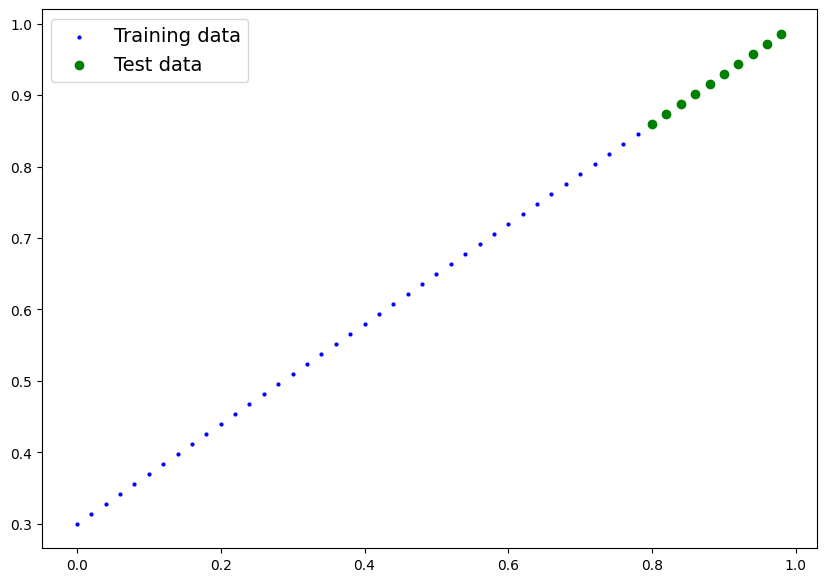

In [116]:
plot_prediction()

In [117]:
# linear regression model
from torch import nn # nn: serves as building block or a template to design or create layers, models, or neural network
class LinearRegressionModelTest(nn.Module): # nn.Module: serves as building block or a template to design or create layers, models, or neural network

  def __init__(self): # initializes the instance of the model
    super().__init__()
    #nn.Parameter can be conceptualized as follows:
    """
        it adjusts the parameter for example weight and bias in this class works automatically using gradients that are defined in torch, so when we pass data it adjusts the weights and bias so that the approximates
        of it are calculated in such a way that the loss function is minimized?

    """
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    """
    so here the forward function takes some data, then it calculautes or predicts or creates some outputs based on the data input, weights and bias, and when weights and bias are nn.Parameters with gradient,
    when we create a model what this function and the class together does is tries to matches the outputs to the label data which in this case does by adjustiing weights and bias via gradient
    """
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [118]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias



In [119]:
torch.manual_seed(32)
model_0 = LinearRegressionModel()

# parameters
list(model_0.parameters())


[Parameter containing:
 tensor([0.8651], requires_grad=True),
 Parameter containing:
 tensor([0.0284], requires_grad=True)]

In [120]:
print(model_0.state_dict())

OrderedDict([('weights', tensor([0.8651])), ('bias', tensor([0.0284]))])


In [121]:
with torch.inference_mode (): # a preffered mode to ignore grad_mode
    y_preds = model_0(X_test)


print(y_preds)
print(y_test - y_preds)

tensor([[0.7205],
        [0.7378],
        [0.7551],
        [0.7724],
        [0.7897],
        [0.8070],
        [0.8243],
        [0.8416],
        [0.8589],
        [0.8762]])
tensor([[0.1395],
        [0.1362],
        [0.1329],
        [0.1296],
        [0.1263],
        [0.1230],
        [0.1197],
        [0.1164],
        [0.1131],
        [0.1098]])


In [122]:
y_preds2 = model_0(X_test)
print(y_preds2 - y_test)

tensor([[-0.1395],
        [-0.1362],
        [-0.1329],
        [-0.1296],
        [-0.1263],
        [-0.1230],
        [-0.1197],
        [-0.1164],
        [-0.1131],
        [-0.1098]], grad_fn=<SubBackward0>)


In [126]:
# training model
# make a model move from unknown or random parameters to known parameters
# loss function: to measure how varied or wrong the model's predictions are in comaprision to ideal or expected ones
# optimizer: takes into account the loss of a model and adjusts the model's parameters to improve the loss function
# learning rate: how much data is adjusted in response to error
# loss function: measures how far off the model parameters are
loss_fn = nn.L1Loss()

# optimizer: stochastic graident descent is used to minimize loss
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.001)



In [ ]:
# training and testing loop
# loop througth the daa -> forward pass to make predictions> calculate the loss compare forward pass predictions to real or givem truth labels -> optimize the loss ->
# optimize the loss -> adjust the values and move backward to calculate gradients with respect to loss -> optimize to adjust model's parameters to improve loss

# epoch: loop through the data
epochs = 1
for epoch in range(epochs):
    model_0.train